In [30]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import dipy.tracking.utils as dtu
import pandas as pd
import nibabel as nib
%matplotlib inline

In [2]:
ls /Users/aarya/Atlas/tracks/association

AF_L.trk*   C_L.trk*    IFOF_L.trk* MdLF_L.trk* UF_L.trk*   VOF_L.trk*
AF_R.trk*   C_R.trk*    IFOF_R.trk* MdLF_R.trk* UF_R.trk*   VOF_R.trk*
AST_L.trk*  EMC_L.trk*  ILF_L.trk*  SLF_L.trk*  U_L.trk*
AST_R.trk*  EMC_R.trk*  ILF_R.trk*  SLF_R.trk*  U_R.trk*


In [13]:
s = '/Users/aarya/Atlas/tracks/association/AF_L.trk'
s.split('/')[-1]

'AF_L.trk'

In [3]:
DATA_PATH = "/Users/aarya/Atlas/tracks/association"

import os
import os.path as op
from glob import glob

In [10]:
labels = [f for f in os.listdir(DATA_PATH) if not f.startswith('.')]
labels

['AF_L.trk',
 'AF_R.trk',
 'AST_L.trk',
 'AST_R.trk',
 'C_L.trk',
 'C_R.trk',
 'EMC_L.trk',
 'EMC_R.trk',
 'IFOF_L.trk',
 'IFOF_R.trk',
 'ILF_L.trk',
 'ILF_R.trk',
 'MdLF_L.trk',
 'MdLF_R.trk',
 'SLF_L.trk',
 'SLF_R.trk',
 'U_L.trk',
 'U_R.trk',
 'UF_L.trk',
 'UF_R.trk',
 'VOF_L.trk',
 'VOF_R.trk']

In [5]:
bundle_fnames = glob(op.join(DATA_PATH, '*.trk'))
bundle_fnames[0]

'/Users/aarya/Atlas/tracks/association/AF_L.trk'

In [6]:
t1_shape = (256, 256, 150)

In [9]:
sl_sum = 0
for b_idx, bundle in enumerate(bundle_fnames):
    tgram = nib.streamlines.load(op.join(DATA_PATH, bundle))
    print(bundle, len(tgram.streamlines))
    sl_sum += len(tgram.streamlines)
sl_sum

('/Users/aarya/Atlas/tracks/association/AF_L.trk', 2358)
('/Users/aarya/Atlas/tracks/association/AF_R.trk', 1145)
('/Users/aarya/Atlas/tracks/association/AST_L.trk', 2074)
('/Users/aarya/Atlas/tracks/association/AST_R.trk', 1777)
('/Users/aarya/Atlas/tracks/association/C_L.trk', 1890)
('/Users/aarya/Atlas/tracks/association/C_R.trk', 2185)
('/Users/aarya/Atlas/tracks/association/EMC_L.trk', 1642)
('/Users/aarya/Atlas/tracks/association/EMC_R.trk', 709)
('/Users/aarya/Atlas/tracks/association/IFOF_L.trk', 2106)
('/Users/aarya/Atlas/tracks/association/IFOF_R.trk', 2731)
('/Users/aarya/Atlas/tracks/association/ILF_L.trk', 2170)
('/Users/aarya/Atlas/tracks/association/ILF_R.trk', 638)
('/Users/aarya/Atlas/tracks/association/MdLF_L.trk', 461)
('/Users/aarya/Atlas/tracks/association/MdLF_R.trk', 670)
('/Users/aarya/Atlas/tracks/association/SLF_L.trk', 2101)
('/Users/aarya/Atlas/tracks/association/SLF_R.trk', 1954)
('/Users/aarya/Atlas/tracks/association/U_L.trk', 7346)
('/Users/aarya/Atlas/t

46558

In [15]:
def get_bname(f):
    return f.split('/')[-1].split('.')[0]
get_bname('/Users/aarya/Atlas/tracks/association/AF_L.trk')

'AF_L'

In [19]:
ii = 0
one_hot_arr = [0] * sl_sum
newpath = '/Users/aarya/Atlas/tracks/association/slines' 
if not os.path.exists(newpath):
    os.makedirs(newpath)
for b_idx, bundle in enumerate(bundle_fnames):
    tgram = nib.streamlines.load(op.join(DATA_PATH, bundle))
    print(bundle, len(tgram.streamlines))
    for sl_idx, sl in enumerate(list(dtu.move_streamlines(tgram.streamlines, np.linalg.inv(tgram.affine)))):
            bname = get_bname(bundle)
            savepath = newpath+"/"+bname+'_'+str(sl_idx)
            if not np.mod(sl_idx, 100):
                #print("Streamline {0} at index {1}".format(sl_idx, ii))
                print("Streamline {0} at index {1} of Bundle {2} saved at path {3}".format(sl_idx, ii, bname, savepath))
            vol = np.zeros(t1_shape + (1,), dtype=bool)
            sl = np.round(sl).astype(int).T
            vol[sl[0], sl[1], sl[2]] = 1
            a1 = np.max(vol, 0).squeeze()
            for x in range(1,3):
                a1 = np.concatenate((a1, np.max(vol, x).squeeze()), axis=1)
            np.save(savepath, a1)
#            bundle_arr[bundle] = vol
#             one_hot = np.zeros(len(bundle_fnames), dtype=bool)
#             one_hot[b_idx] = 1
#             one_hot_arr[ii] = one_hot
            ii += 1

('/Users/aarya/Atlas/tracks/association/AF_L.trk', 2358)
Streamline 0 at index 0 of Bundle AF_L saved at path /Users/aarya/Atlas/tracks/association/slines/AF_L_0
Streamline 100 at index 100 of Bundle AF_L saved at path /Users/aarya/Atlas/tracks/association/slines/AF_L_100
Streamline 200 at index 200 of Bundle AF_L saved at path /Users/aarya/Atlas/tracks/association/slines/AF_L_200
Streamline 300 at index 300 of Bundle AF_L saved at path /Users/aarya/Atlas/tracks/association/slines/AF_L_300
Streamline 400 at index 400 of Bundle AF_L saved at path /Users/aarya/Atlas/tracks/association/slines/AF_L_400
Streamline 500 at index 500 of Bundle AF_L saved at path /Users/aarya/Atlas/tracks/association/slines/AF_L_500
Streamline 600 at index 600 of Bundle AF_L saved at path /Users/aarya/Atlas/tracks/association/slines/AF_L_600
Streamline 700 at index 700 of Bundle AF_L saved at path /Users/aarya/Atlas/tracks/association/slines/AF_L_700
Streamline 800 at index 800 of Bundle AF_L saved at path /Use

Streamline 1400 at index 6977 of Bundle AST_R saved at path /Users/aarya/Atlas/tracks/association/slines/AST_R_1400
Streamline 1500 at index 7077 of Bundle AST_R saved at path /Users/aarya/Atlas/tracks/association/slines/AST_R_1500
Streamline 1600 at index 7177 of Bundle AST_R saved at path /Users/aarya/Atlas/tracks/association/slines/AST_R_1600
Streamline 1700 at index 7277 of Bundle AST_R saved at path /Users/aarya/Atlas/tracks/association/slines/AST_R_1700
('/Users/aarya/Atlas/tracks/association/C_L.trk', 1890)
Streamline 0 at index 7354 of Bundle C_L saved at path /Users/aarya/Atlas/tracks/association/slines/C_L_0
Streamline 100 at index 7454 of Bundle C_L saved at path /Users/aarya/Atlas/tracks/association/slines/C_L_100
Streamline 200 at index 7554 of Bundle C_L saved at path /Users/aarya/Atlas/tracks/association/slines/C_L_200
Streamline 300 at index 7654 of Bundle C_L saved at path /Users/aarya/Atlas/tracks/association/slines/C_L_300
Streamline 400 at index 7754 of Bundle C_L s

Streamline 100 at index 13880 of Bundle IFOF_L saved at path /Users/aarya/Atlas/tracks/association/slines/IFOF_L_100
Streamline 200 at index 13980 of Bundle IFOF_L saved at path /Users/aarya/Atlas/tracks/association/slines/IFOF_L_200
Streamline 300 at index 14080 of Bundle IFOF_L saved at path /Users/aarya/Atlas/tracks/association/slines/IFOF_L_300
Streamline 400 at index 14180 of Bundle IFOF_L saved at path /Users/aarya/Atlas/tracks/association/slines/IFOF_L_400
Streamline 500 at index 14280 of Bundle IFOF_L saved at path /Users/aarya/Atlas/tracks/association/slines/IFOF_L_500
Streamline 600 at index 14380 of Bundle IFOF_L saved at path /Users/aarya/Atlas/tracks/association/slines/IFOF_L_600
Streamline 700 at index 14480 of Bundle IFOF_L saved at path /Users/aarya/Atlas/tracks/association/slines/IFOF_L_700
Streamline 800 at index 14580 of Bundle IFOF_L saved at path /Users/aarya/Atlas/tracks/association/slines/IFOF_L_800
Streamline 900 at index 14680 of Bundle IFOF_L saved at path /Us

Streamline 2000 at index 20617 of Bundle ILF_L saved at path /Users/aarya/Atlas/tracks/association/slines/ILF_L_2000
Streamline 2100 at index 20717 of Bundle ILF_L saved at path /Users/aarya/Atlas/tracks/association/slines/ILF_L_2100
('/Users/aarya/Atlas/tracks/association/ILF_R.trk', 638)
Streamline 0 at index 20787 of Bundle ILF_R saved at path /Users/aarya/Atlas/tracks/association/slines/ILF_R_0
Streamline 100 at index 20887 of Bundle ILF_R saved at path /Users/aarya/Atlas/tracks/association/slines/ILF_R_100
Streamline 200 at index 20987 of Bundle ILF_R saved at path /Users/aarya/Atlas/tracks/association/slines/ILF_R_200
Streamline 300 at index 21087 of Bundle ILF_R saved at path /Users/aarya/Atlas/tracks/association/slines/ILF_R_300
Streamline 400 at index 21187 of Bundle ILF_R saved at path /Users/aarya/Atlas/tracks/association/slines/ILF_R_400
Streamline 500 at index 21287 of Bundle ILF_R saved at path /Users/aarya/Atlas/tracks/association/slines/ILF_R_500
Streamline 600 at index

Streamline 500 at index 27111 of Bundle U_L saved at path /Users/aarya/Atlas/tracks/association/slines/U_L_500
Streamline 600 at index 27211 of Bundle U_L saved at path /Users/aarya/Atlas/tracks/association/slines/U_L_600
Streamline 700 at index 27311 of Bundle U_L saved at path /Users/aarya/Atlas/tracks/association/slines/U_L_700
Streamline 800 at index 27411 of Bundle U_L saved at path /Users/aarya/Atlas/tracks/association/slines/U_L_800
Streamline 900 at index 27511 of Bundle U_L saved at path /Users/aarya/Atlas/tracks/association/slines/U_L_900
Streamline 1000 at index 27611 of Bundle U_L saved at path /Users/aarya/Atlas/tracks/association/slines/U_L_1000
Streamline 1100 at index 27711 of Bundle U_L saved at path /Users/aarya/Atlas/tracks/association/slines/U_L_1100
Streamline 1200 at index 27811 of Bundle U_L saved at path /Users/aarya/Atlas/tracks/association/slines/U_L_1200
Streamline 1300 at index 27911 of Bundle U_L saved at path /Users/aarya/Atlas/tracks/association/slines/U_

Streamline 400 at index 34357 of Bundle U_R saved at path /Users/aarya/Atlas/tracks/association/slines/U_R_400
Streamline 500 at index 34457 of Bundle U_R saved at path /Users/aarya/Atlas/tracks/association/slines/U_R_500
Streamline 600 at index 34557 of Bundle U_R saved at path /Users/aarya/Atlas/tracks/association/slines/U_R_600
Streamline 700 at index 34657 of Bundle U_R saved at path /Users/aarya/Atlas/tracks/association/slines/U_R_700
Streamline 800 at index 34757 of Bundle U_R saved at path /Users/aarya/Atlas/tracks/association/slines/U_R_800
Streamline 900 at index 34857 of Bundle U_R saved at path /Users/aarya/Atlas/tracks/association/slines/U_R_900
Streamline 1000 at index 34957 of Bundle U_R saved at path /Users/aarya/Atlas/tracks/association/slines/U_R_1000
Streamline 1100 at index 35057 of Bundle U_R saved at path /Users/aarya/Atlas/tracks/association/slines/U_R_1100
Streamline 1200 at index 35157 of Bundle U_R saved at path /Users/aarya/Atlas/tracks/association/slines/U_R_

Streamline 7700 at index 41657 of Bundle U_R saved at path /Users/aarya/Atlas/tracks/association/slines/U_R_7700
Streamline 7800 at index 41757 of Bundle U_R saved at path /Users/aarya/Atlas/tracks/association/slines/U_R_7800
Streamline 7900 at index 41857 of Bundle U_R saved at path /Users/aarya/Atlas/tracks/association/slines/U_R_7900
Streamline 8000 at index 41957 of Bundle U_R saved at path /Users/aarya/Atlas/tracks/association/slines/U_R_8000
Streamline 8100 at index 42057 of Bundle U_R saved at path /Users/aarya/Atlas/tracks/association/slines/U_R_8100
Streamline 8200 at index 42157 of Bundle U_R saved at path /Users/aarya/Atlas/tracks/association/slines/U_R_8200
Streamline 8300 at index 42257 of Bundle U_R saved at path /Users/aarya/Atlas/tracks/association/slines/U_R_8300
Streamline 8400 at index 42357 of Bundle U_R saved at path /Users/aarya/Atlas/tracks/association/slines/U_R_8400
Streamline 8500 at index 42457 of Bundle U_R saved at path /Users/aarya/Atlas/tracks/association

In [24]:
def get_label(path):
    x = path.split('/')[-1].split('_')[:2]
    return '_'.join(x)

In [40]:
def get_dataframe(directory):
    paths = [os.path.join(directory, f) for f in os.listdir(directory) if not f.startswith('.')]
    labels = [get_label(path) for path in paths if not path.startswith('.')]
    return pd.DataFrame({'paths': paths, 'labels': labels})
d = get_dataframe(newpath)
d.head()

,labels,paths
0,AF_L,/Users/aarya/Atlas/tracks/association/slines/A...
1,AF_L,/Users/aarya/Atlas/tracks/association/slines/A...
2,AF_L,/Users/aarya/Atlas/tracks/association/slines/A...
3,AF_L,/Users/aarya/Atlas/tracks/association/slines/A...
4,AF_L,/Users/aarya/Atlas/tracks/association/slines/A...


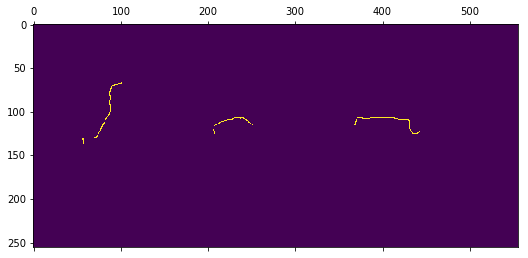

In [45]:
foo = np.load(d['paths'][0])
plt.matshow(foo)